In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
# CSV file path in Google Drive
# file_path = '/content/drive/MyDrive/Dataset/DigitalExposome Dataset.csv'
file_path = '../DigitalExposome Dataset.csv'
# Load dataset using Pandas
df = pd.read_csv(file_path)

# Display the top 5 rows of the dataset
df.head()

,IBI,HR,NO2,Noise,NH3,PM10,CO,PM25,Label,PM1,EDA,BVP
0,0.0,0.377574,0.0,0.511358,0.003018,0.003091,0.871758,0.000000,5,0.000000,0.0,0.0
1,0.0,0.196398,0.0,0.490903,0.003018,0.003091,0.876848,0.003091,5,0.001854,0.0,0.0
2,0.0,0.454163,0.0,0.470449,0.006036,0.006181,0.881939,0.006181,5,0.003709,0.0,0.0
3,0.0,0.322451,0.0,0.449995,0.009055,0.009272,0.887030,0.009272,5,0.005563,0.0,0.0
4,0.0,0.237595,0.0,0.429540,0.012073,0.012362,0.892121,0.012362,5,0.007417,0.0,0.0


In [3]:
df.describe()

,IBI,HR,NO2,Noise,NH3,PM10,CO,PM25,Label,PM1,EDA,BVP
count,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000
mean,0.178688,0.530687,0.502239,0.427541,0.564276,0.208474,0.679874,0.224901,3.326185,0.230773,0.260318,0.482902
std,0.230127,0.266531,0.274914,0.247601,0.294515,0.210981,0.308111,0.223242,1.599863,0.255253,0.221725,0.175569
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.309505,0.285412,0.214008,0.305285,0.017624,0.458047,0.012362,2.000000,0.006310,0.060686,0.449963
50%,0.016760,0.491213,0.489703,0.403671,0.644756,0.158454,0.805352,0.176150,4.000000,0.176316,0.216064,0.512280
75%,0.309984,0.776388,0.736983,0.618592,0.826943,0.326889,0.909832,0.376813,5.000000,0.407268,0.421109,0.579756
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,5.000000,24.000000,1.000000,1.000000


In [4]:
print("Shape:", df.shape)
print("Columns:", df.columns)

Shape: (42436, 12)
Columns: Index(['IBI', 'HR', 'NO2', 'Noise', 'NH3', 'PM10', 'CO', 'PM25', 'Label',
       'PM1', 'EDA', 'BVP'],
      dtype='object')


# Check Data type

In [5]:
print("\nData Types:")
df.info()


Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42436 entries, 0 to 42435
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IBI     42436 non-null  float64
 1   HR      42436 non-null  float64
 2   NO2     42436 non-null  float64
 3   Noise   42436 non-null  float64
 4   NH3     42436 non-null  float64
 5   PM10    42436 non-null  float64
 6   CO      42436 non-null  float64
 7   PM25    42436 non-null  float64
 8   Label   42436 non-null  int64  
 9   PM1     42436 non-null  float64
 10  EDA     42436 non-null  float64
 11  BVP     42436 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 3.9 MB


In [6]:
print("\nData Types:")
df.info()


Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42436 entries, 0 to 42435
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IBI     42436 non-null  float64
 1   HR      42436 non-null  float64
 2   NO2     42436 non-null  float64
 3   Noise   42436 non-null  float64
 4   NH3     42436 non-null  float64
 5   PM10    42436 non-null  float64
 6   CO      42436 non-null  float64
 7   PM25    42436 non-null  float64
 8   Label   42436 non-null  int64  
 9   PM1     42436 non-null  float64
 10  EDA     42436 non-null  float64
 11  BVP     42436 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 3.9 MB


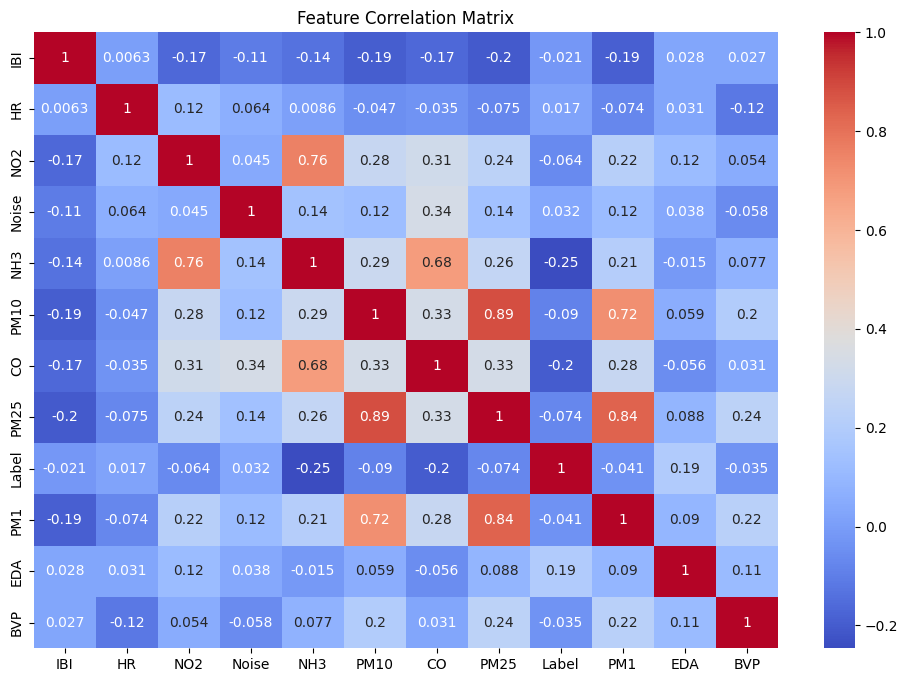

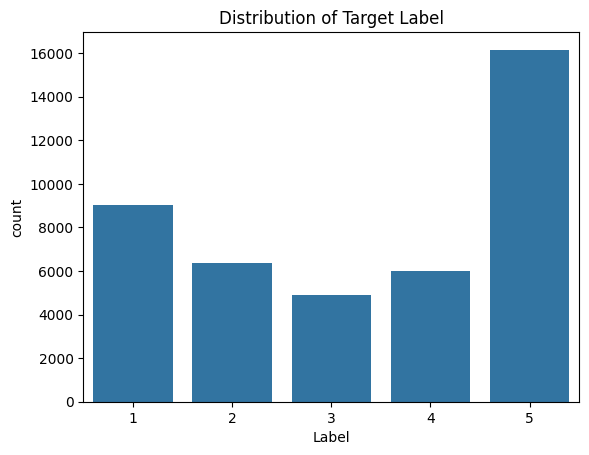

In [7]:
# Heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

# Distribusi Label
sns.countplot(x='Label', data=df)
plt.title("Distribution of Target Label")
plt.show()

In [8]:
### Outlier Detection and Removal using Z-score
z_scores = np.abs(stats.zscore(df))
df = df[(z_scores < 3).all(axis=1)]  # Keep only rows where all Z-scores < 3

In [9]:
import numpy as np
import pandas as pd
from scipy import stats

# Pastikan hanya kolom numerik
numeric_df = df.select_dtypes(include=[np.number])

# Hitung Z-score absolut
z_scores = np.abs(stats.zscore(numeric_df))

# Buat DataFrame Z-score agar mudah dianalisis
z_scores_df = pd.DataFrame(
    z_scores,
    index=numeric_df.index,
    columns=numeric_df.columns
)

# Hitung jumlah nilai dengan Z-score >= 3 per kolom
outlier_counts = (z_scores_df >= 3).sum()

# Tampilkan hasil
print("Jumlah outlier (|Z-score| >= 3) per fitur:")
print(outlier_counts)

# Opsional: Tampilkan dalam bentuk DataFrame yang rapi
outlier_summary = pd.DataFrame({
    'Fitur': outlier_counts.index,
    'Jumlah_Outlier': outlier_counts.values
})
print("\nRingkasan:")
print(outlier_summary)

Jumlah outlier (|Z-score| >= 3) per fitur:
IBI      186
HR         0
NO2        0
Noise      0
NH3        0
PM10     231
CO         0
PM25      63
Label      0
PM1      105
EDA       42
BVP        0
dtype: int64

Ringkasan:
    Fitur  Jumlah_Outlier
0     IBI             186
1      HR               0
2     NO2               0
3   Noise               0
4     NH3               0
5    PM10             231
6      CO               0
7    PM25              63
8   Label               0
9     PM1             105
10    EDA              42
11    BVP               0


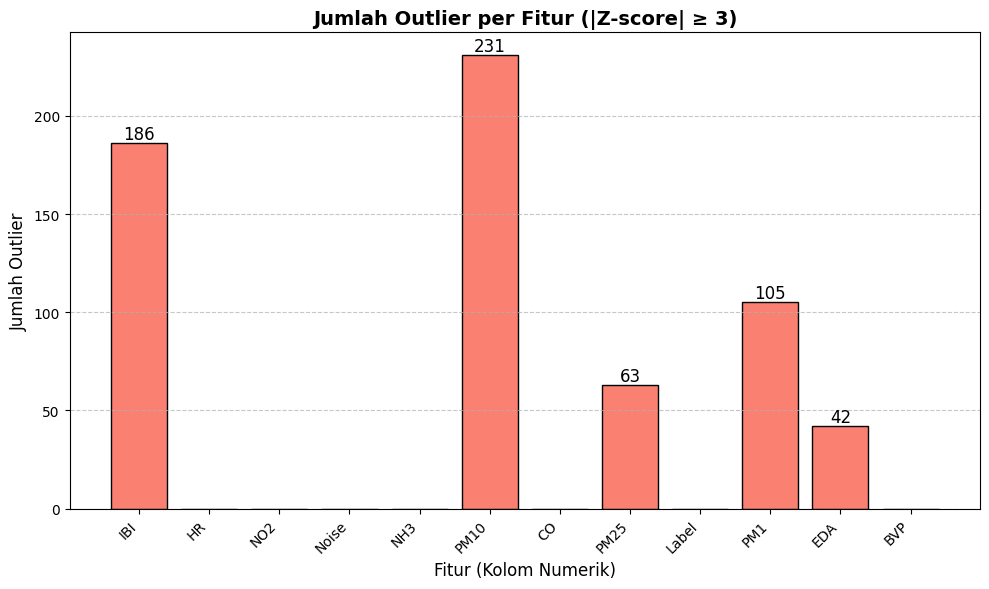


Jumlah outlier per fitur:
IBI      186
HR         0
NO2        0
Noise      0
NH3        0
PM10     231
CO         0
PM25      63
Label      0
PM1      105
EDA       42
BVP        0


In [10]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan hanya kolom numerik
numeric_df = df.select_dtypes(include=[np.number])

# Hitung Z-score absolut
z_scores = np.abs(stats.zscore(numeric_df))

# Buat DataFrame Z-score
z_scores_df = pd.DataFrame(
    z_scores,
    index=numeric_df.index,
    columns=numeric_df.columns
)

# Hitung jumlah outlier per fitur (|Z| >= 3)
outlier_counts = (z_scores_df >= 3).sum()

# --- Visualisasi ---
plt.figure(figsize=(10, 6))
bars = plt.bar(outlier_counts.index, outlier_counts.values, color='salmon', edgecolor='black')

# Tambahkan angka di atas setiap batang
for bar in bars:
    height = bar.get_height()
    if height > 0:
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                 f'{int(height)}',
                 ha='center', va='bottom', fontsize=12)

plt.title('Jumlah Outlier per Fitur (|Z-score| ≥ 3)', fontsize=14, weight='bold')
plt.xlabel('Fitur (Kolom Numerik)', fontsize=12)
plt.ylabel('Jumlah Outlier', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Opsional: Tampilkan juga dalam bentuk tabel
print("\nJumlah outlier per fitur:")
print(outlier_counts.to_string())

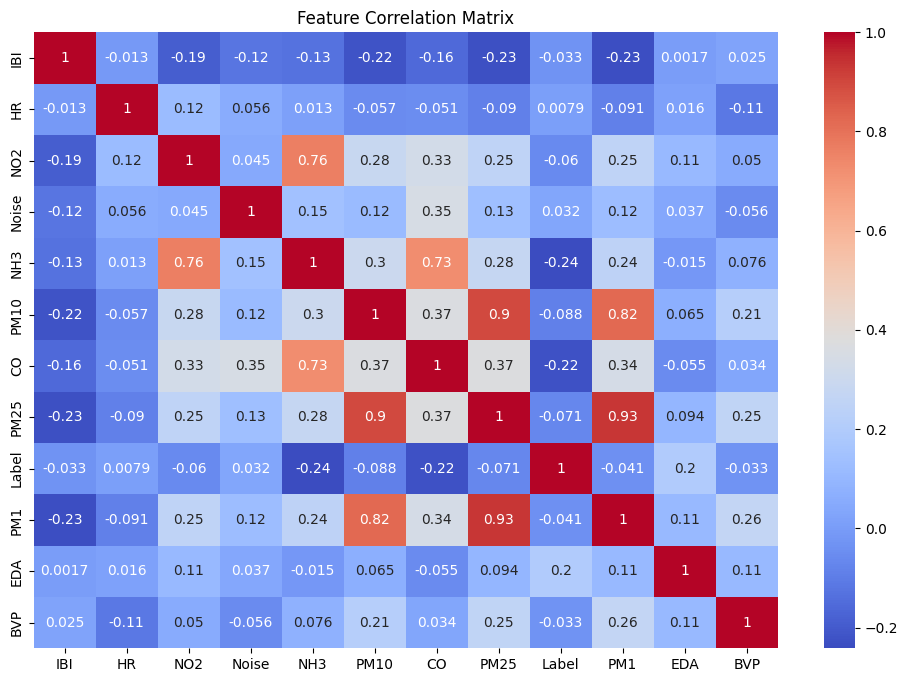

In [11]:
# Heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()
